In [1]:
import cv2
import numpy as np
import os
from random import shuffle
from tqdm import tqdm
import tensorflow as tf
import matplotlib.pyplot as plt
import keras

Using TensorFlow backend.


In [2]:
import tflearn
from tflearn.layers.conv import conv_2d,max_pool_2d
from tflearn.layers.core import input_data,fully_connected,dropout
from tflearn.layers.estimator import regression

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


W1124 19:37:55.489938   816 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\tflearn\helpers\summarizer.py:9: The name tf.summary.merge is deprecated. Please use tf.compat.v1.summary.merge instead.

W1124 19:37:55.513151   816 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\tflearn\helpers\trainer.py:25: The name tf.summary.FileWriter is deprecated. Please use tf.compat.v1.summary.FileWriter instead.

W1124 19:37:55.847990   816 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\tflearn\collections.py:13: The name tf.GraphKeys is deprecated. Please use tf.compat.v1.GraphKeys instead.

W1124 19:37:56.067255   816 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\tflearn\config.py:123: The name tf.get_collection is deprecated. Please use tf.compat.v1.get_collection instead.

W1124 19:37:56.809402   816 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\tflearn\config.py:129

In [3]:
TRAIN_DIR='C:/Users/HP/Downloads/dogs-cats-images/dataset/training_set'
TEST_DIR='C:/Users/HP/Downloads/dogs-cats-images/dataset/test_set'

In [4]:
img_size=50
Model_name='dogs_vs_cats convnet'

In [5]:
def create_label(image_name):
    word_label=image_name.split('.')[-3]
    if word_label=='cat':
        return np.array([1,0])
    elif word_label=='dog':
        return np.array([0,1])

In [6]:
def create_train_data():
    training_data=[]
    for img in tqdm(os.listdir(TRAIN_DIR)):
        path=os.path.join(TRAIN_DIR,img)
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img_data is not None:
            img_data = cv2.resize(img_data, (img_size,img_size))
            training_data.append([np.array(img_data), create_label(img)])
        else:
            print("image not loaded")
    shuffle(training_data)
    np.save('traindata.npy',training_data)
    return training_data

In [7]:
def create_test_data():
    testing_data=[]
    for img in tqdm(os.listdir(TEST_DIR)):
        path=os.path.join(TEST_DIR,img)
        img_num=img.split('.')[0]
        img_data=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        if img_data is not None:
            img_data = cv2.resize(img_data, (img_size,img_size))
            testing_data.append([np.array(img_data), create_label(img)])
        else:
            print("image not loaded")
    shuffle(testing_data)    
    np.save('test_data.npy',testing_data)
    return testing_data

In [8]:
train_data=create_train_data()
test_data=create_test_data()
train=train_data[:-500]
test=train_data[-500:]
X_train=np.array([i[0] for i in train]).reshape(-1,img_size,img_size,1)
Y_train=[i[1] for i in train]
X_test=np.array([i[0] for i in test]).reshape(-1,img_size,img_size,1)
Y_test=[i[1] for i in test]
tf.reset_default_graph()

100%|██████████████████████████████████████████████████████████████████████████████| 2000/2000 [00:49<00:00, 40.26it/s]


In [9]:
convnet=input_data(shape=[None,img_size,img_size,1],name='input')

W1124 19:42:02.187958   816 deprecation_wrapper.py:119] From C:\Users\HP\Anaconda3\lib\site-packages\tflearn\layers\core.py:81: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [10]:
LR=1e-3
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,128,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,64,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=conv_2d(convnet,32,5,activation='relu')
convnet=max_pool_2d(convnet,5)
convnet=fully_connected(convnet,1024,activation='relu')
convnet=dropout(convnet,0.8)
convnet=fully_connected(convnet,2,activation='softmax')
convnet=regression(convnet,optimizer='adam',learning_rate=LR,loss='categorical_crossentropy',name='targets')
model=tflearn.DNN(convnet,tensorboard_dir='log',tensorboard_verbose=0)
model.fit({'input':X_train},{'targets':Y_train},n_epoch=10,validation_set=({'input':X_test},{'targets':Y_test}),snapshot_step=500,show_metric=True,run_id=Model_name)

Training Step: 1179  | total loss: 0.30064 | time: 23.750s
| Adam | epoch: 010 | loss: 0.30064 - acc: 0.8784 -- iter: 7488/7500
Training Step: 1180  | total loss: 0.29259 | time: 24.975s
| Adam | epoch: 010 | loss: 0.29259 - acc: 0.8812 | val_loss: 0.54048 - val_acc: 0.7900 -- iter: 7500/7500
--


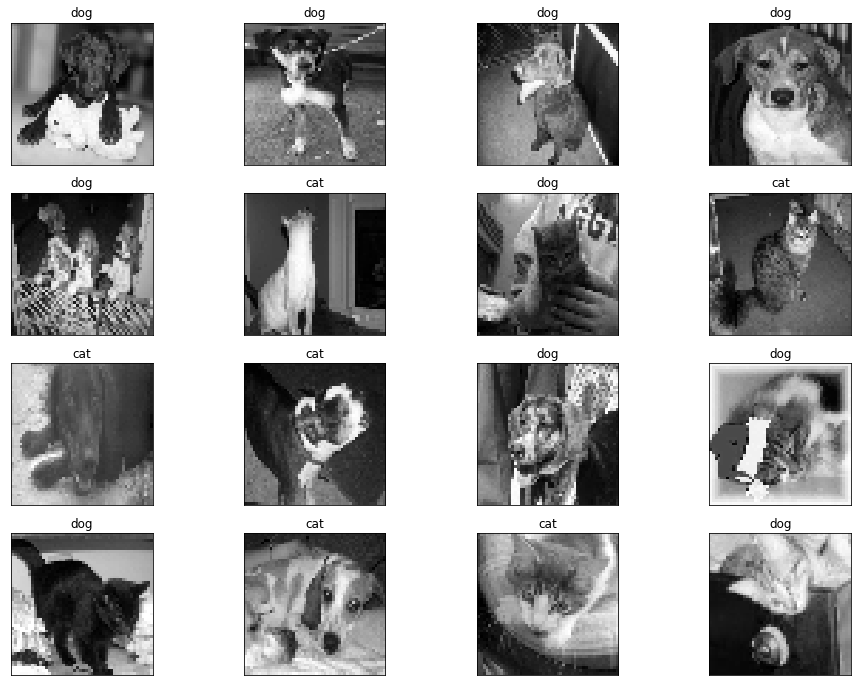

In [11]:
fig=plt.figure(figsize=(16,12))
for num,data in enumerate(test_data[:16]):
    img_num=data[1]
    img_data=data[0]
    y=fig.add_subplot(4,4,num+1)
    orig=img_data
    data=img_data.reshape(img_size,img_size,1)
    model_out= model.predict([data])[0]
    if np.argmax(model_out)==1:
        str_label='dog'
    else:
        str_label='cat'
    y.imshow(orig,cmap='gray')
    plt.title(str_label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
plt.show()
    

In [ ]:
hello